In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read data from text file
df1 = pd.read_csv('wine.data', delimiter=',')

df1.columns = ['Class','Alcohol', 'Malic acid', 'Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids',
              'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','diluted wines','Proline']
# Show the dataframe
df1

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)

pca_result = pca.fit_transform(df1)   
pca_result                             ## every PCA column is independent to each other....

array([[ 3.04899963e+02, -5.14076193e+00],
       [ 4.39864419e+02, -6.24036973e+00],
       [ 7.35040360e+02,  6.06511153e-01],
       [-9.77749060e+00,  1.86054042e+01],
       [ 7.05031571e+02,  6.59091383e-02],
       [ 5.44777297e+02, -1.31881386e+01],
       [ 5.50197839e+02,  1.17878435e+01],
       [ 2.99840671e+02, -7.95201739e+00],
       [ 2.99853054e+02, -6.86836534e+00],
       [ 7.64883347e+02, -7.90510573e+00],
       [ 5.34749397e+02, -1.39551162e+01],
       [ 5.74643166e+02, -2.06571799e+01],
       [ 4.04732057e+02, -1.58369134e+01],
       [ 8.01858171e+02, -1.16871785e+01],
       [ 5.65045215e+02,  2.56048099e+00],
       [ 5.35176044e+02,  1.11431374e+01],
       [ 3.85115063e+02,  8.75435291e+00],
       [ 9.34921806e+02, -7.85750276e+00],
       [ 1.00198310e+02,  1.45402591e+01],
       [ 3.53843747e+01,  2.56887620e+01],
       [ 2.49468301e+01,  1.94322345e+00],
       [ 2.89895300e+02, -3.73412455e+00],
       [ 2.69786117e+02, -9.34589612e+00],
       [ 9.

In [4]:
# Create a new dataframe with PCA results
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

df_pca

,PC1,PC2
0,304.899963,-5.140762
1,439.864419,-6.240370
2,735.040360,0.606511
3,-9.777491,18.605404
4,705.031571,0.065909
...,...,...
172,-5.180166,-4.412484
173,4.929033,2.472565
174,90.248764,18.942102
175,95.246946,18.837722


In [5]:
df_pca['Class'] = df1['Class']

df_pca

,PC1,PC2,Class
0,304.899963,-5.140762,1
1,439.864419,-6.240370,1
2,735.040360,0.606511,1
3,-9.777491,18.605404,1
4,705.031571,0.065909,1
...,...,...,...
172,-5.180166,-4.412484,3
173,4.929033,2.472565,3
174,90.248764,18.942102,3
175,95.246946,18.837722,3


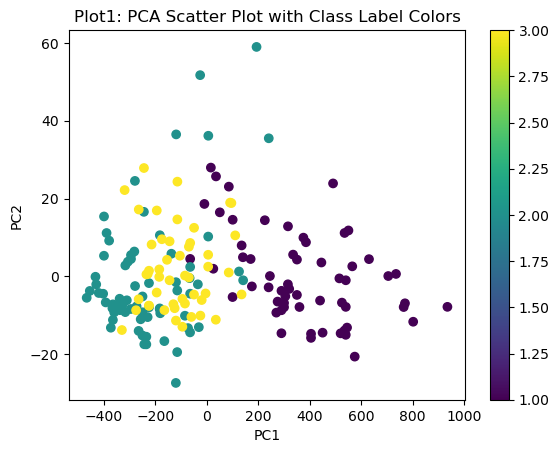

In [6]:
        # Plot1: Scatter plot with class label colors
            ## compare both PCA columns using scatter plot
plt.scatter(x= df_pca['PC1'], y= df_pca['PC2'], c= df_pca['Class'], cmap= 'viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Plot1: PCA Scatter Plot with Class Label Colors')
plt.colorbar()
plt.show()

# Apply K-mean clustering on the new PCA dataframe

In [7]:
from sklearn.cluster import KMeans

# Apply clustering algorithm
kmeans = KMeans(n_clusters = 3)
cluster_labels = kmeans.fit_predict(df1)           

# Add cluster labels to the PCA dataframe
df_pca['Cluster'] = cluster_labels

In [8]:
cluster_labels

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0,
       0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0])

In [9]:
df_pca

,PC1,PC2,Class,Cluster
0,304.899963,-5.140762,1,1
1,439.864419,-6.240370,1,1
2,735.040360,0.606511,1,1
3,-9.777491,18.605404,1,2
4,705.031571,0.065909,1,1
...,...,...,...,...
172,-5.180166,-4.412484,3,2
173,4.929033,2.472565,3,2
174,90.248764,18.942102,3,2
175,95.246946,18.837722,3,2


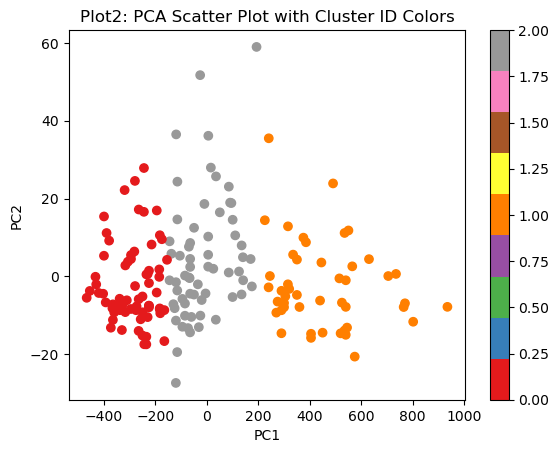

In [10]:
        # Plot2: Scatter plot with cluster ID colors
plt.scatter(x=df_pca['PC1'], y=df_pca['PC2'], c=df_pca['Cluster'], cmap='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Plot2: PCA Scatter Plot with Cluster ID Colors')
plt.colorbar()
plt.show()

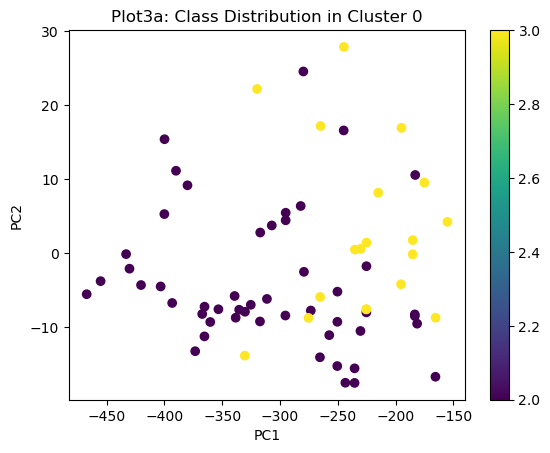

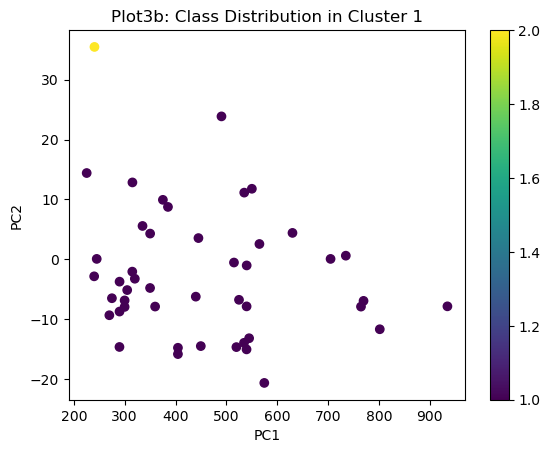

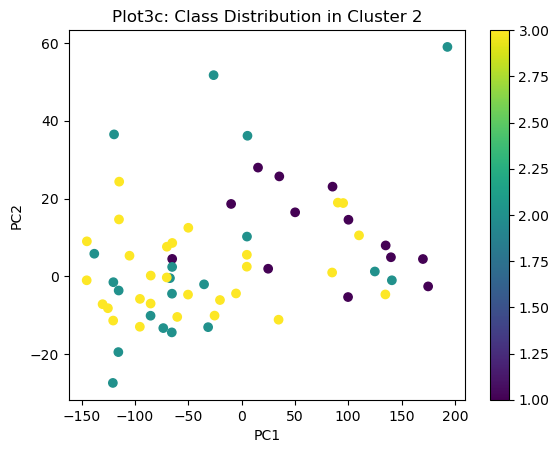

In [11]:
# Filter the PCA dataframe based on cluster ID and create individual plots
for cluster_id in range(3):
    cluster_df = df_pca[df_pca['Cluster'] == cluster_id]
    plt.scatter(x=cluster_df['PC1'], y=cluster_df['PC2'], c=cluster_df['Class'], cmap='viridis')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'Plot3{chr(97+cluster_id)}: Class Distribution in Cluster {cluster_id}')
    plt.colorbar()
    plt.show()

# Lets see the cluster result

In [12]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

        # Calculate Silhouette Coefficient
silhouette_score_value = silhouette_score(df1, cluster_labels)

        # Calculate Davies-Bouldin Index
davies_bouldin_score_value = davies_bouldin_score(df1, cluster_labels)

    # Print the results
print(f"Silhouette Coefficient: {silhouette_score_value}")
print(f"Davies-Bouldin Index: {davies_bouldin_score_value}")

Silhouette Coefficient: 0.5709621417552556
Davies-Bouldin Index: 0.5336622359674715
